# Student Performance Prediction

1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

In [154]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Data Cleaning

In [115]:
url = "data.csv"
df = pd.read_csv(url, sep = ";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [116]:
df = df.rename(columns={df.columns[4]: "Daytime or evening attendance"})

In [117]:
#Check Null
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime or evening attendance                     0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [118]:
#Check Dupe
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [119]:
#Describing data
df.describe()

,Marital status,Application mode,Application order,Course,Daytime or evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [120]:
#Check every feature data type and its name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime or evening attendance                   4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

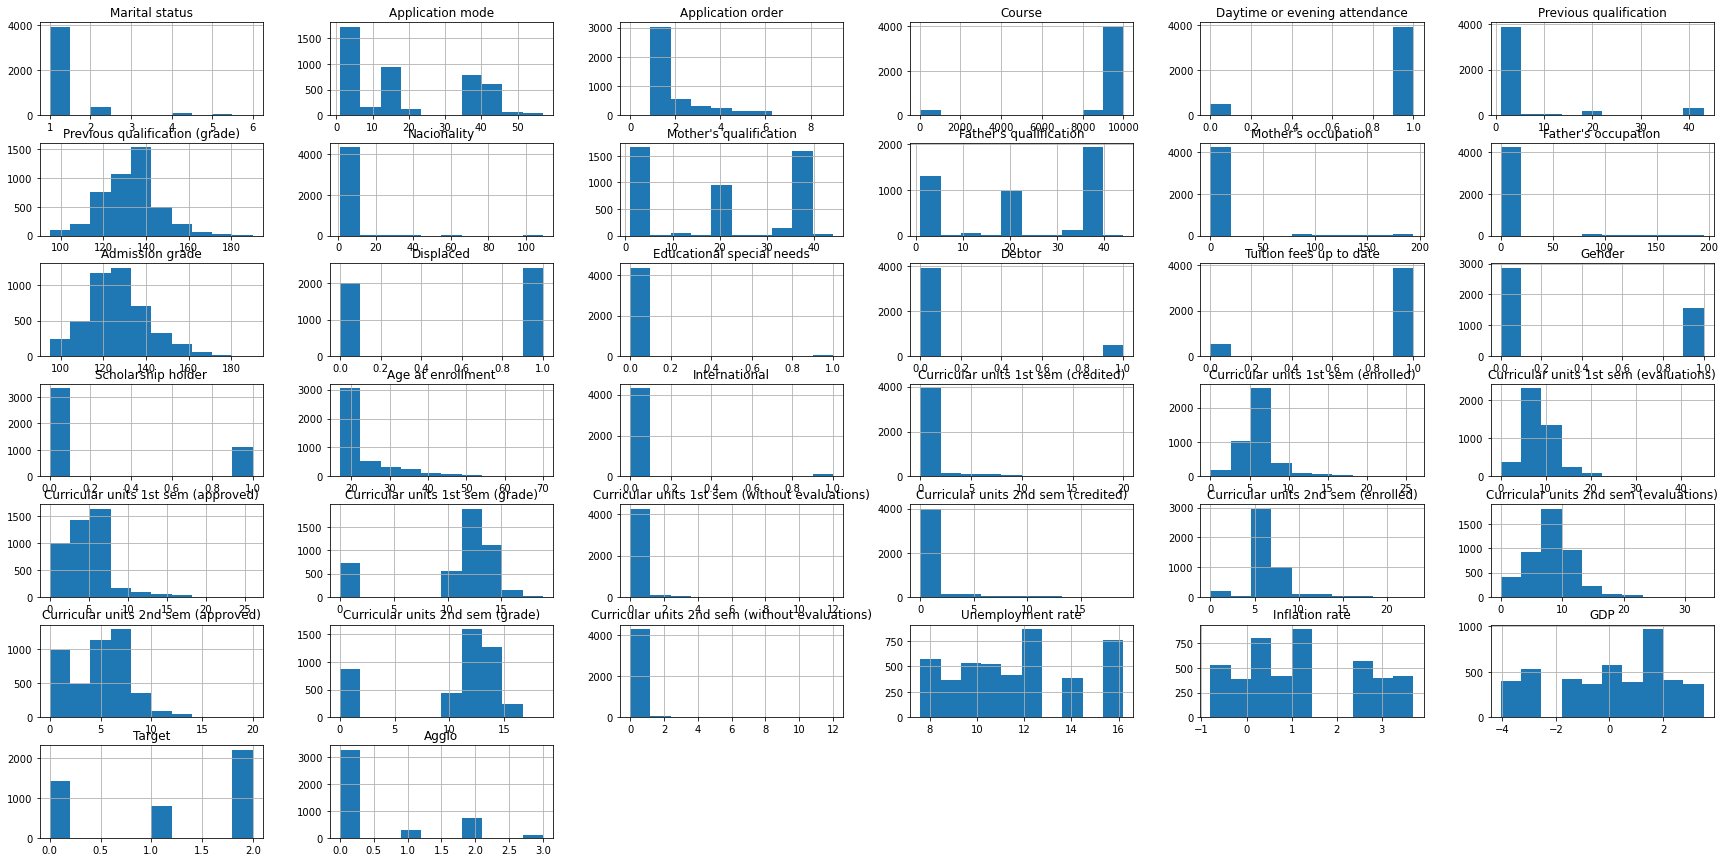

In [151]:
#Univariate EDA
df.hist(bins=10, figsize=(30, 15))
plt.show()

<AxesSubplot:>

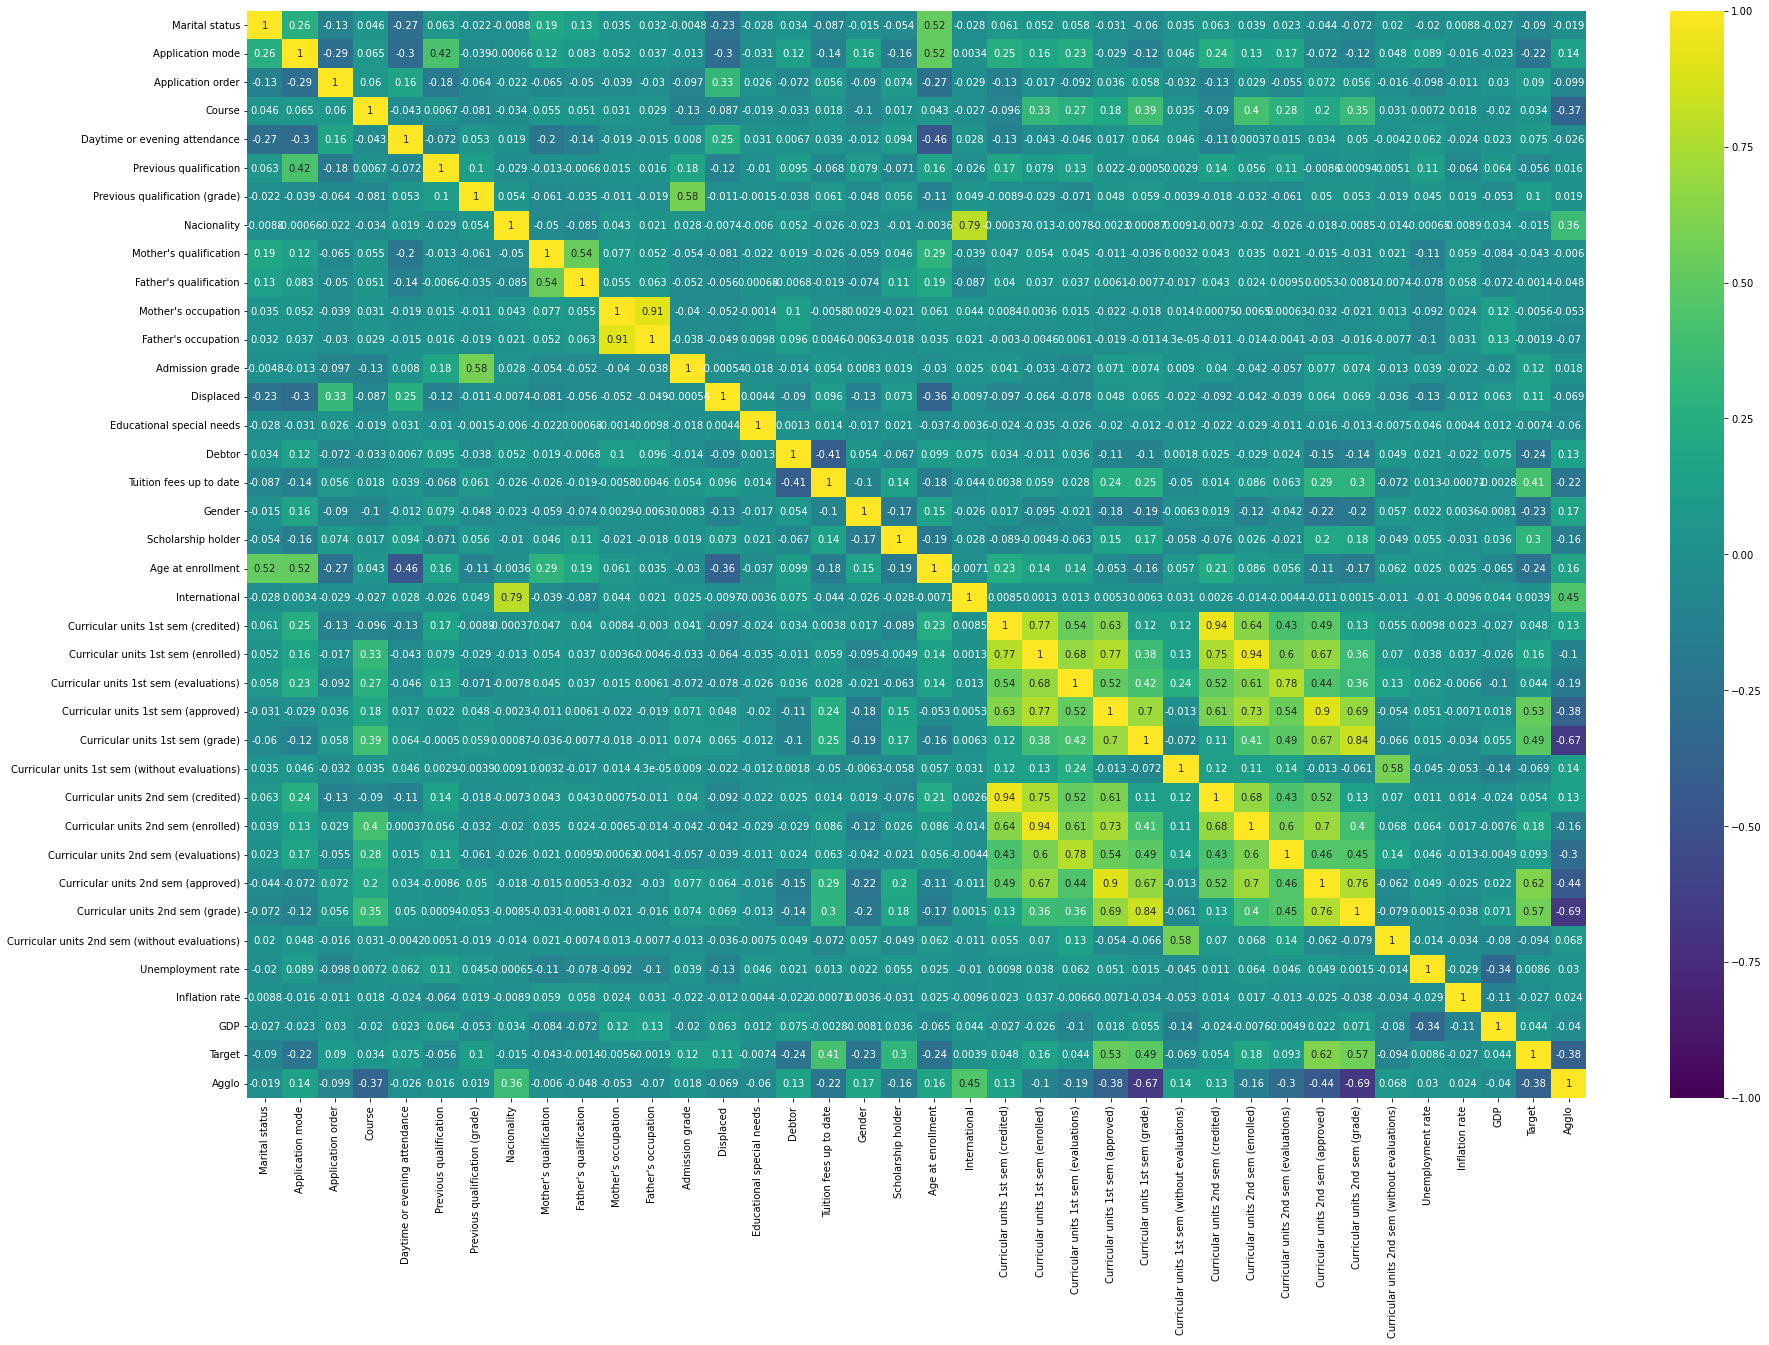

In [155]:
#Multivariate EDA
corr_matrix=df.corr()
plt.figure(1, figsize=(30,20))
sns.heatmap(corr_matrix, cmap='viridis', center=0, annot=True, vmin=-1, vmax=1)

Enrolled: 2209
Dropout: 1421
Graduate: 794


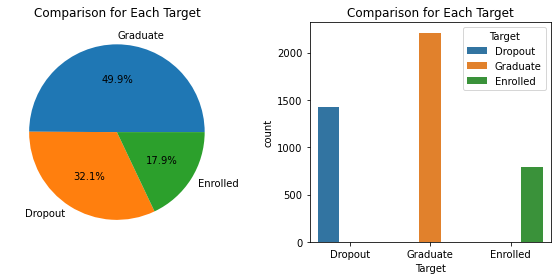

In [123]:
#Univariate EDA
#Using Bar & Pie Chart as Comparison for each target by its count
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart
df['Target'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Comparison for Each Target')
ax[0].set_ylabel('')

# Bar chart
sns.countplot(x='Target', data=df, ax=ax[1], hue='Target')
ax[1].set_title('Comparison for Each Target')

# Calculate and display the counts for each outcome
M, N, D = df['Target'].value_counts()
print('Enrolled:', M)
print('Dropout:', N)
print('Graduate:', D)

plt.tight_layout()
plt.show()

In [149]:
#Multivariate EDA
df.corr()

,Marital status,Application mode,Application order,Course,Daytime or evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Agglo
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804,-0.019357
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747,0.136351
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791,-0.099154
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219,-0.366024
Daytime or evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107,-0.026205
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039,0.015665
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764,0.018860
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801,0.360647
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178,-0.006041
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393,-0.047592


# Data Preprocessing

In [125]:
#Determine dependent & independent variable
X = df.drop('Target', axis=1) #independent variables
y = df['Target'] #dependent variable

print(X.head())
print("---------------------Break Section------------------")
print(y.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime or evening attendance  Previous qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                   

In [126]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])
df.head()

,Marital status,Application mode,Application order,Course,Daytime or evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [127]:
#Create new dataframe with scaled data for cluister using K-Means & Hierarchical Clustering  (Number 3)
#PS: it'll not affect main dataframe because i create new separated dataframe using old dataframe that already scaled
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.29482875, -0.09547022,  2.49089589, ...,  0.12438647,
         0.76576084, -1.32649743],
       [-0.29482875, -0.20986898, -0.55406775, ..., -1.10522155,
         0.34719942,  0.9253923 ],
       [-0.29482875, -1.01066035,  2.49089589, ...,  0.12438647,
         0.76576084, -1.32649743],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ..., -1.10522155,
         0.34719942, -1.32649743],
       [-0.29482875, -1.01066035, -0.55406775, ..., -1.46687097,
        -1.37551124,  0.9253923 ],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  1.7879738 ,
        -0.74987207,  0.9253923 ]])

In [148]:
#Scaling data for prediction model (Number 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime or evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# Clustering using K-Means

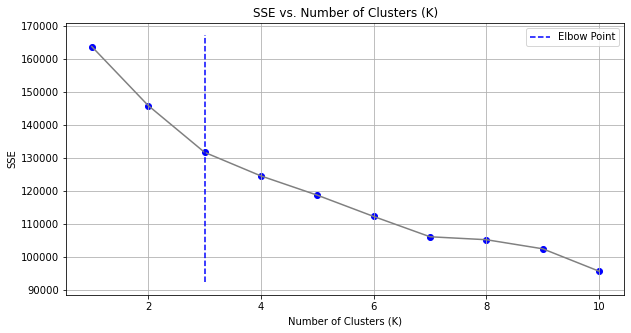

In [130]:
from sklearn.cluster import KMeans
kmeans_kwargs = {"init" : "k-means++","n_init" :10,"max_iter":300, "random_state":42}
sse=[]
#Check the inertia for each K
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(scaled_data) 
    sse.append(kmeans.inertia_)
    
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(10, 5))
plt.plot(range(1,11), sse, color='gray')
plt.scatter(range(1,11),sse,color='blue')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='blue', label='Elbow Point')
plt.legend()
plt.show()

In [131]:
#Using kneelocator to find the elbow/knee
kneed = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneed.elbow)

The best k for you model is 3


# Clustering using Hierarchical Clustering

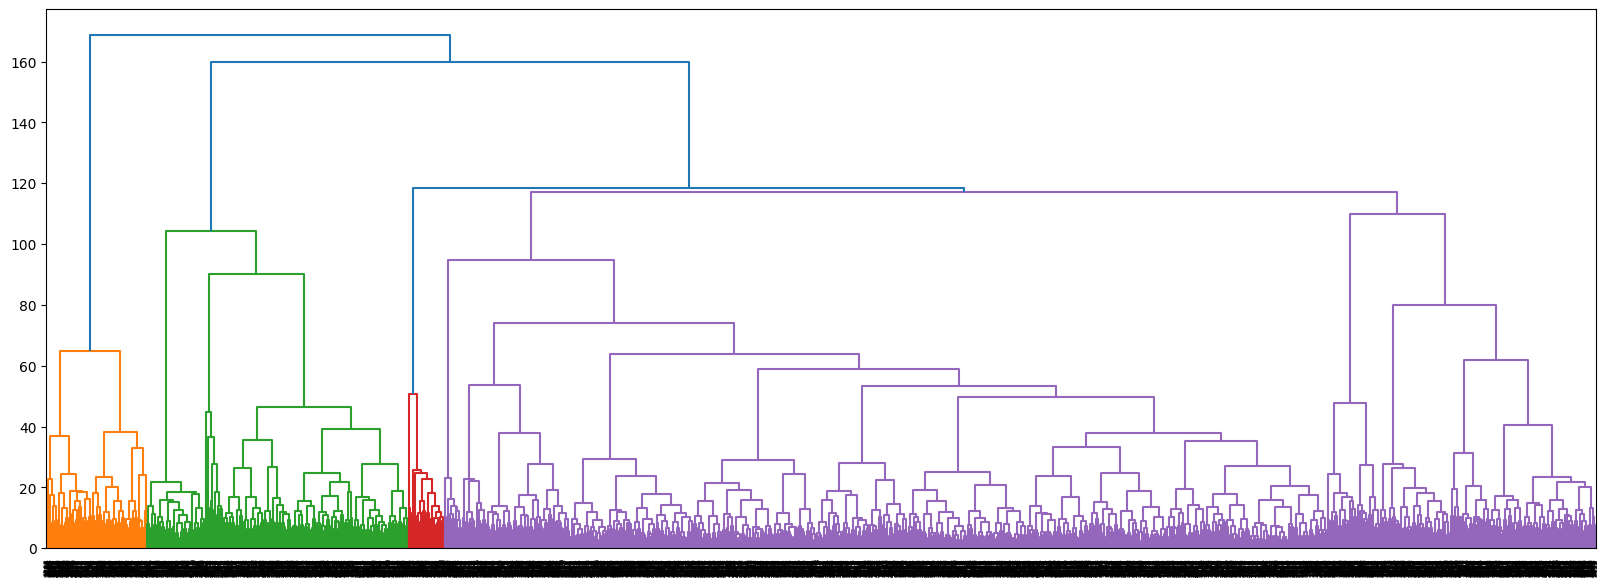

In [191]:
#Ward Method
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled_data, method='ward')
dendrogram(linkage_data)
plt.show()

In [146]:
#Perform Hierarchical Clustering using euclidean metric and cluster still same as K-Means method
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
label = model.fit_predict(scaled_data)
df["Agglo"] = label
print(label)

[2 0 2 ... 0 0 3]


In [133]:
#For Categorical using mode (Only feature target that's categorical(before encoded))
df.groupby("Agglo")["Target"].agg(pd.Series.mode)

Agglo
0    2
1    2
2    0
3    2
Name: Target, dtype: int32

In [147]:
#For Numerical using mean (All feature except target that's numerical)
featuresMeanAgglo = ["Marital status", "Application mode", "Application order", "Course", "Daytime or evening attendance",
                    "Previous qualification", "Previous qualification (grade)", "Nacionality",
                    "Father's qualification", "Mother's qualification",
                    "Father's qualification", "Mother's occupation", "Father's occupation", "Admission grade",
                    "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date",
                    "Gender", "Scholarship holder", "Age at enrollment", "International",
                    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
                    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
                    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
                    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
                    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
                    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
                    "Unemployment rate", "Inflation rate", "GDP"]

#Group by "Agglo" and calculate the mean for each feature
df.groupby("Agglo")[featuresMeanAgglo].agg(pd.Series.mean)

,Marital status,Application mode,Application order,Course,Daytime or evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Father's qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Agglo,,,,,,,,,,,,,,,,,,,,,
0,1.178582,16.664740,1.825373,9324.038029,0.902647,4.318223,132.590508,1.007606,22.446912,19.431701,...,0.077274,0.144813,6.212656,8.476118,4.963493,12.171788,0.118649,11.521022,1.197536,0.073435
1,1.296167,33.247387,1.132404,8001.041812,0.752613,7.864111,131.311498,1.456446,24.888502,22.135889,...,0.229965,6.341463,11.139373,14.118467,9.501742,12.615743,0.167247,11.493380,1.466551,-0.215157
2,1.147256,21.891566,1.555556,7156.793842,0.882195,4.670683,132.659170,1.032129,21.688086,19.779116,...,0.362784,0.105756,4.500669,4.004016,0.244980,0.788884,0.297189,11.808434,1.281124,-0.311767
3,1.077670,18.640777,1.524272,8652.912621,0.961165,3.029126,136.635922,36.757282,13.776699,14.970874,...,0.174757,0.213592,5.737864,7.456311,3.873786,10.094639,0.048544,11.451456,1.151456,0.601650


In [135]:
df.groupby("Agglo")["Agglo"].agg(pd.Series.count)

Agglo
0    3287
1     287
2     747
3     103
Name: Agglo, dtype: int64

# Prediction using Logistic Regression
- NB: Data already scaled on the top (Data preparation section)

In [136]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

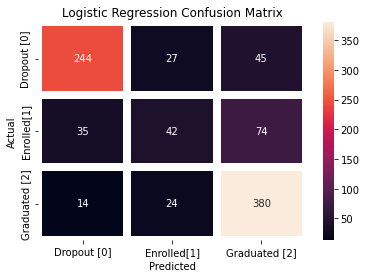

Accuracy Logistic Regression: 0.752542372881356


In [137]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

status = ["Dropout [0]" , "Enrolled[1]", "Graduated [2]"]

ax = sns.heatmap(cm, annot=True, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression: {accuracy}')
lr_test_acc = accuracy_score(y_test, y_pred)

# Prediction using K-Nearest Neighbor Classifier

In [138]:
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

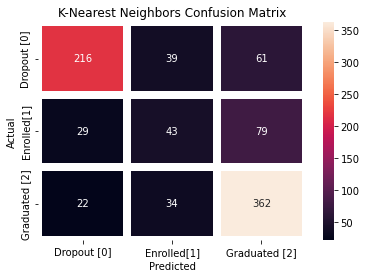

Accuracy KNN: 0.7016949152542373


In [139]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

status = ["Dropout [0]" , "Enrolled[1]", "Graduated [2]"]

ax = sns.heatmap(cm, annot=True, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy KNN: {accuracy}')
knn_test_acc = accuracy_score(y_test, y_pred)

# Prediction using Decision Tree

In [140]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

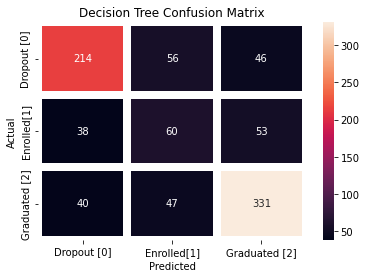

Accuracy DT: 0.6836158192090396


In [141]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

status = ["Dropout [0]" , "Enrolled[1]", "Graduated [2]"]


sns.heatmap(cm,  annot=True, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision Tree Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy DT: {accuracy}')
tree_test_acc = accuracy_score(y_test, y_pred)

# Prediction using Random Forest

In [142]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

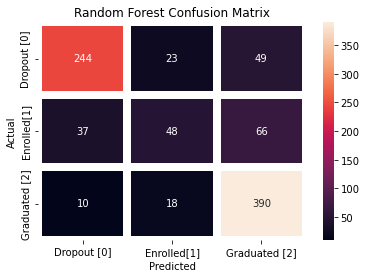

Accuracy Random Forest: 0.7706214689265537


In [143]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

status = ["Dropout [0]" , "Enrolled[1]", "Graduated [2]"]

ax = sns.heatmap(cm, annot=True, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Random Forest: {accuracy}')
rdm_test_acc = accuracy_score(y_test, y_pred)

# Prediction Model Comparison Result

In [144]:
models = pd.DataFrame({
    'Model': [        
        'Logistic Regression','K-Nearest Neighbors', 'Decision Tree',
        'Random Forest'
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,tree_test_acc,rdm_test_acc
    ]
})

In [145]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(cmap='rocket')

,Model,Model Accuracy Score
3,Random Forest,0.770621
0,Logistic Regression,0.752542
1,K-Nearest Neighbors,0.701695
2,Decision Tree,0.683616
